#🔍 **Notebook 02: Data Quality Assesment**

Autora: Vanessa

Fecha: 2026-01-21

Objetivo: Análisis profundo de calidad de datos del dataset

______________
📒 Contenido
1. Configuración del entorno
2. Carga de datos
3. Análisis de valores nulos
4. Detección de outliers
5. Análisis de distribuciones
6. Análisis de tipos de datos
7. Reporte de calidad
8. Conclusiones

**1. Configuración del entorno**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

**2. Carga de datos**

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,cliente_id,genero,edad,pais,ciudad,segmento_cliente,es_mayor,tiene_pareja,tiene_dependientes,latitud,...,dias_mora,cambio_plan_reciente,downgrade_reciente,visitas_app_mensual,tiempo_sesion_promedio,features_nuevas_usadas,ultimo_contacto_soporte,competidores_area,ofertas_recibidas,precio_vs_mercado
0,0002-ORFBO,Femenino,36.0,USA,New York,PYME,0,Si,Si,40.726363,...,0,1,0,66,11.51,3,2025-11-27,4,0,Competitivo
1,0003-MKNFE,Masculino,45.0,USA,New York,Residencial,0,No,No,40.678022,...,0,0,0,51,20.17,6,2025-11-10,1,2,Alto
2,0004-TLHLJ,Masculino,36.0,USA,New York,PYME,0,No,No,40.638134,...,0,0,0,5,109.44,5,2025-10-29,6,2,Competitivo
3,0011-IGKFF,Masculino,NaN,USA,New York,PYME,1,Si,No,40.683321,...,0,0,0,9,90.94,0,2025-11-14,2,3,Competitivo
4,0013-EXCHZ,Femenino,48.0,USA,New York,PYME,1,Si,No,40.764546,...,0,0,0,37,113.28,8,2025-08-12,1,0,Alto


**3. Análisis de valores nulos**

In [ ]:
porcentaje_nulos = (df.isnull().mean() * 100).sort_values(ascending=False)

pd.DataFrame({
    "nulos": df.isnull().sum(),
    "porcentaje_%": porcentaje_nulos
}).sort_values("porcentaje_%", ascending=False)

,nulos,porcentaje_%
respuesta_encuesta,1455,14.998454
referencias_hechas,1164,11.998763
edad,776,7.999175
dias_ultima_conexion,485,4.999485
borough,0,0.000000
...,...,...
tipo_contrato,0,0.000000
tipo_internet,0,0.000000
tipo_queja,0,0.000000
ultimo_contacto_soporte,0,0.000000


In [ ]:
columnas_con_nulos = df.columns[df.isnull().any()]
columnas_con_nulos

Index(['edad', 'dias_ultima_conexion', 'respuesta_encuesta',
       'referencias_hechas'],
      dtype='object')

In [ ]:
total_celdas = df.shape[0] * df.shape[1]
total_nulos = df.isnull().sum().sum()
porcentaje_total_nulos = (total_nulos / total_celdas) * 100

print(f"Total de registros: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")
print(f"Total de valores nulos: {total_nulos}")
print(f"Porcentaje total de nulos: {porcentaje_total_nulos:.2f}%")

Total de registros: 9701
Total de columnas: 67
Total de valores nulos: 3880
Porcentaje total de nulos: 0.60%


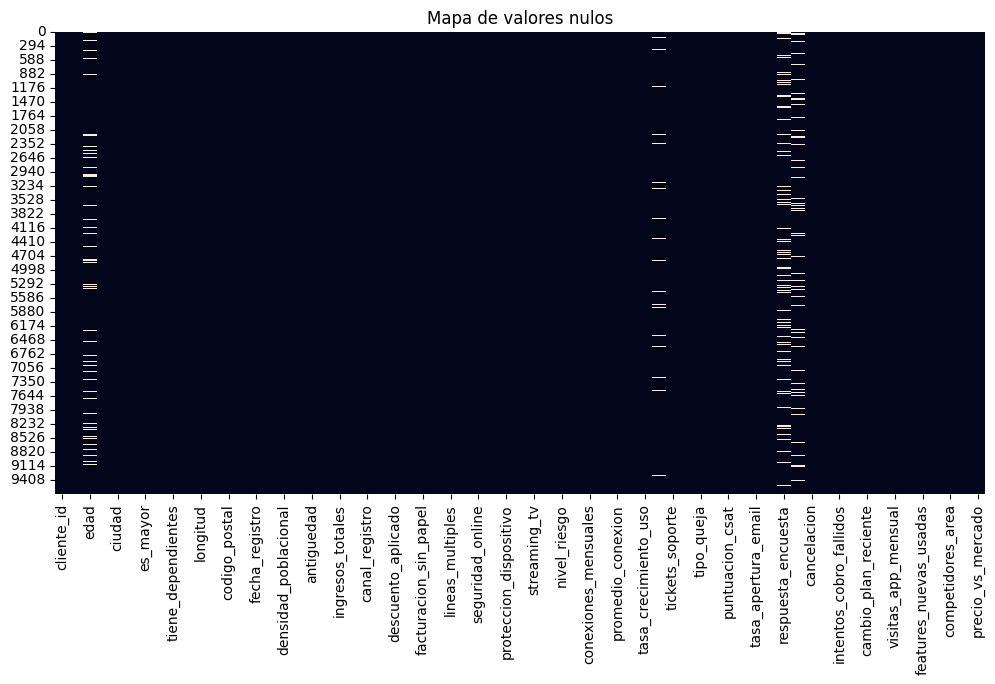

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores nulos")
plt.show()

**4. Detección de outliers**

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

resultados = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    pct_outliers = (n_outliers / len(df)) * 100

    if n_outliers > 0:  # 👉 solo variables con outliers
        resultados.append([col, n_outliers, pct_outliers])

df_outliers = pd.DataFrame(
    resultados,
    columns=["variable", "cantidad_outliers", "porcentaje_outliers"]
).sort_values("porcentaje_outliers", ascending=False)

df_outliers

,variable,cantidad_outliers,porcentaje_outliers
8,score_riesgo,2125,21.904958
16,downgrade_reciente,2072,21.358623
3,densidad_poblacional,1985,20.461808
0,es_mayor,1565,16.132357
15,cancelacion,1522,15.689104
11,escaladas,1466,15.111844
9,dias_ultima_conexion,1220,12.576023
2,longitud,677,6.978662
7,errores_pago,530,5.463354
1,latitud,464,4.783012


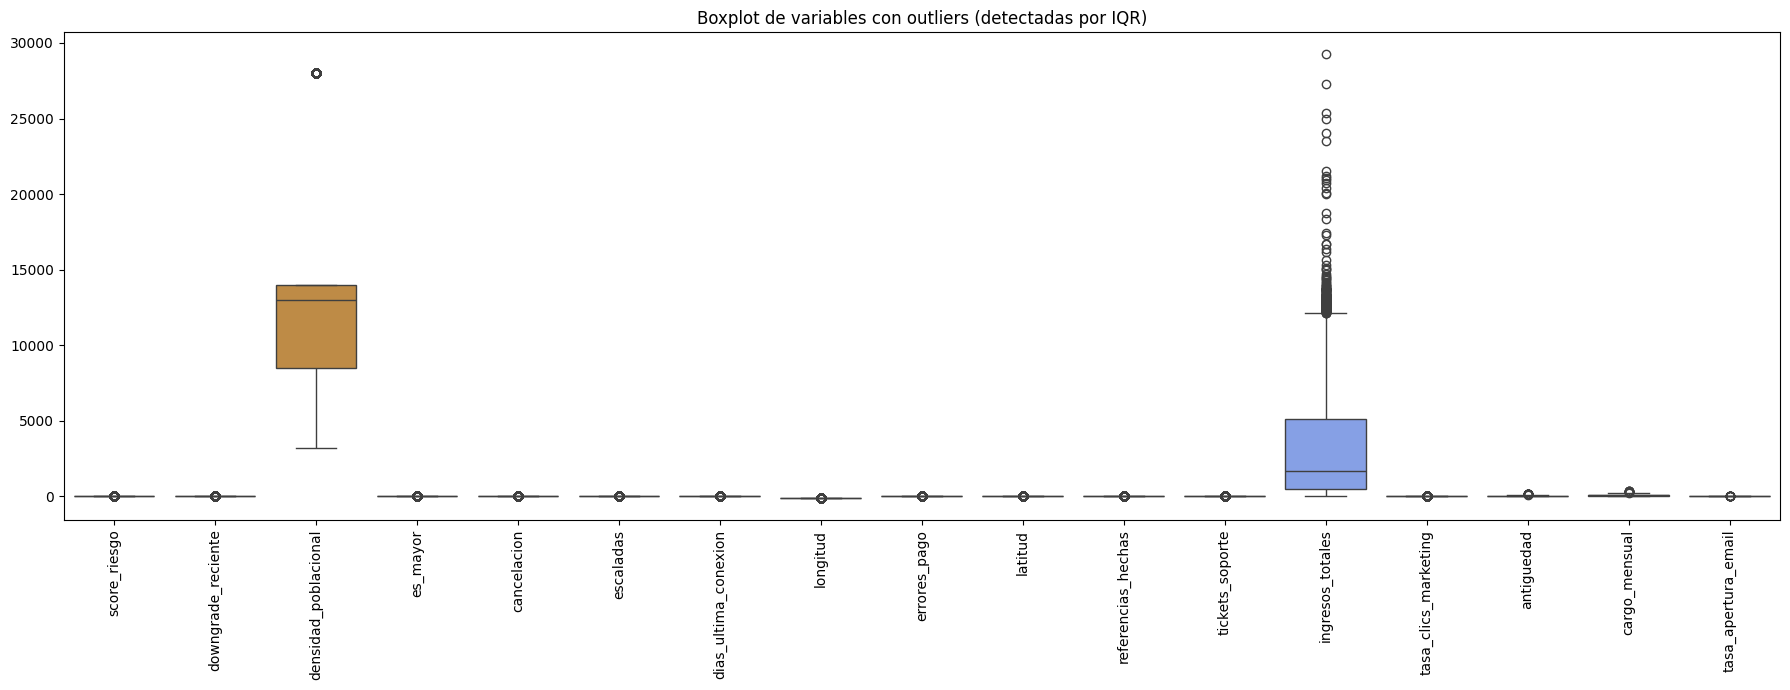

In [ ]:
cols_con_outliers = df_outliers["variable"].tolist()

plt.figure(figsize=(18, 7))
sns.boxplot(data=df[cols_con_outliers])
plt.xticks(rotation=90)
plt.title("Boxplot de variables con outliers (detectadas por IQR)")
plt.tight_layout()
plt.show()

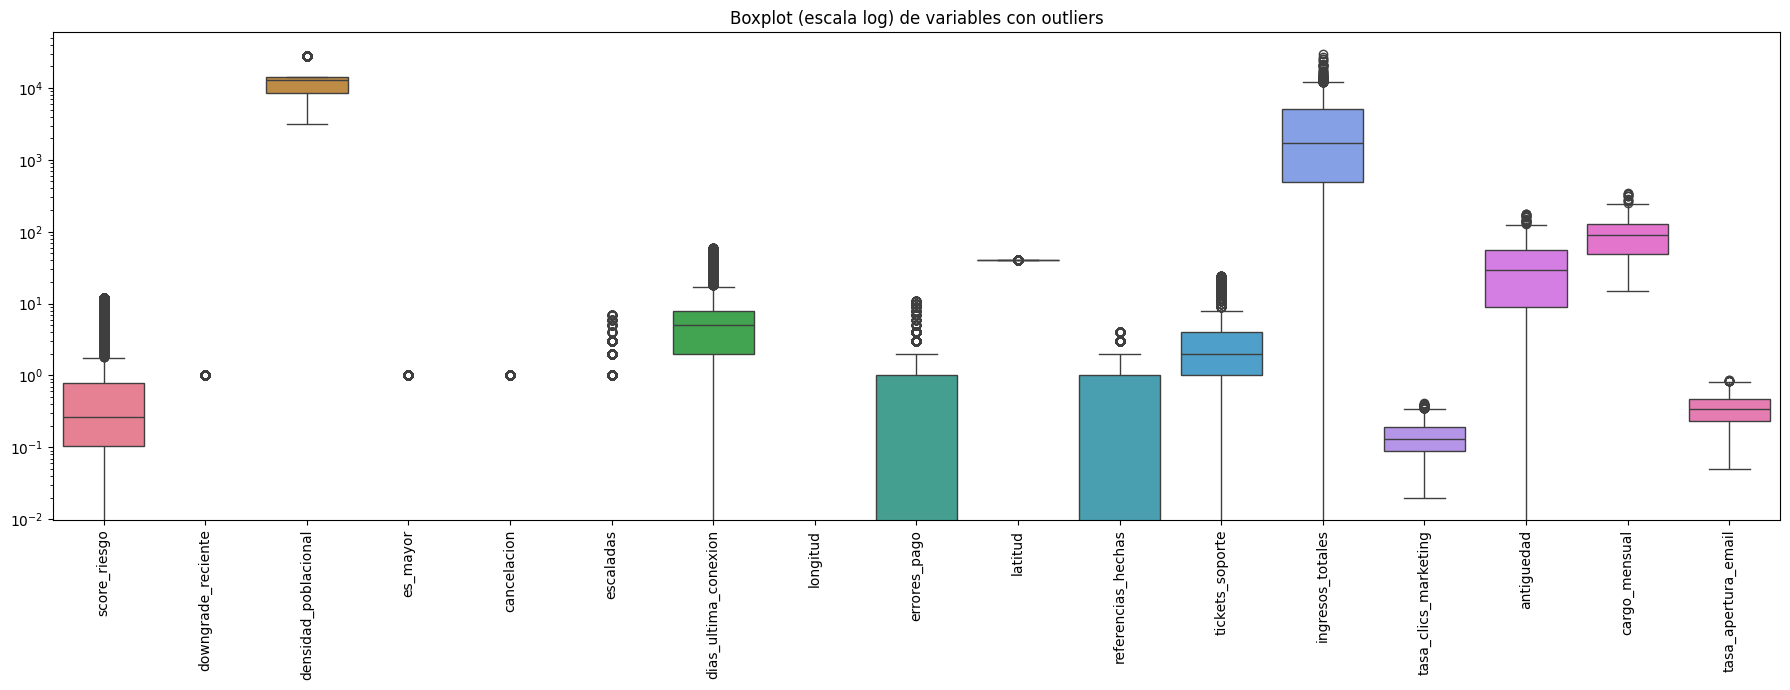

In [ ]:
plt.figure(figsize=(18, 7))
sns.boxplot(data=df[cols_con_outliers])
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Boxplot (escala log) de variables con outliers")
plt.tight_layout()
plt.show()

**5. Análisis de distribución**

,variable,p_value,distribucion_normal
3,longitud,1.655544e-86,False
20,escaladas,1.387683e-84,False
1,es_mayor,1.041475e-82,False
26,cancelacion,1.796467e-82,False
10,errores_pago,8.628073e-81,False
30,downgrade_reciente,9.405134e-80,False
29,cambio_plan_reciente,3.204857e-78,False
11,score_riesgo,3.038018e-76,False
17,dias_ultima_conexion,3.259796e-72,False
25,referencias_hechas,1.101827e-69,False


Interpretación:

p > 0.05 → no se rechaza normalidad

p ≤ 0.05 → no normal

En todos los casos, p ≤ 0.05 así que no se trata de una distribución normal.

Las pruebas de normalidad y los análisis gráficos indican que las variables numéricas no siguen distribuciones normales, presentando asimetría y valores extremos. Este comportamiento es característico de datos de comportamiento de clientes, por lo que no se considera una limitación para el modelado.

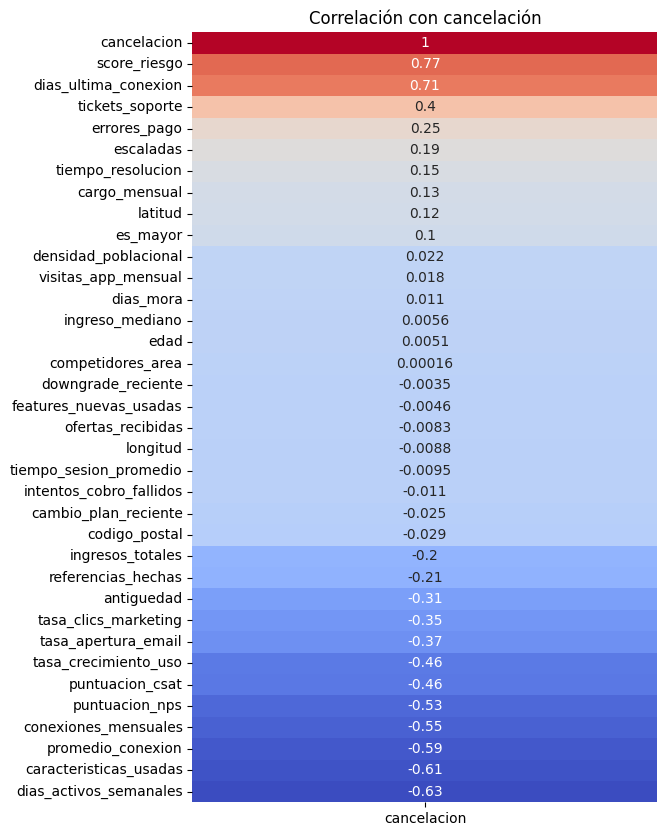

In [ ]:
corr = df[num_cols].corr()["cancelacion"].sort_values(ascending=False)
plt.figure(figsize=(6,10))
sns.heatmap(corr.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlación con cancelación")
plt.show()

El análisis de correlación con la variable objetivo muestra relaciones coherentes desde el punto de vista del negocio. Variables asociadas a riesgo, inactividad y experiencia negativa del cliente presentan correlaciones positivas con la cancelación, mientras que métricas de uso, satisfacción y antigüedad muestran correlaciones negativas significativas, lo que valida la consistencia semántica de los datos.

Asimismo, se identifican variables con correlación cercana a cero, lo cual no indica problemas de calidad sino una baja contribución predictiva individual. Destaca el alto nivel de correlación del score_riesgo, lo que sugiere una posible variable derivada del comportamiento de churn, por lo que se recomienda revisar su origen para evitar posibles problemas de fuga de información en el modelado.

**6. Análisis de tipos de datos**

In [ ]:
df.dtypes.value_counts()

,count
object,31
int64,19
float64,17


In [ ]:
numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categoricas = df.select_dtypes(include=["object"]).columns.tolist()

print("Numéricas:", len(numericas))
print("Categóricas (object):", len(categoricas))

Numéricas: 36
Categóricas (object): 31


**7. Reporte de calidad**

In [46]:
# ===== Preparación de métricas base =====

total_filas, total_cols = df.shape

null_cols = df.columns[df.isnull().any()]
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
object_cols = df.select_dtypes(include="object").columns

duplicados = df.duplicated().sum()

# Si ya tienes df_outliers de antes:
cols_con_outliers = df_outliers["variable"].nunique() if "df_outliers" in globals() else 0

# Cardinalidad alta (posibles IDs)
alta_cardinalidad = [col for col in df.columns if df[col].nunique() == total_filas]

# ===== Reporte de calidad =====

quality_report = {
    "Total_Registros": total_filas,
    "Total_Columnas": total_cols,
    "Memoria_MB": df.memory_usage(deep=True).sum() / 1024**2,

    "Duplicados": duplicados,
    "Porcentaje_Duplicados": (duplicados / total_filas) * 100,

    "Columnas_Con_Nulos": len(null_cols),
    "Total_Nulos": df.isnull().sum().sum(),
    "Porcentaje_Nulos_Global": (df.isnull().sum().sum() / (total_filas * total_cols)) * 100,

    "Columnas_Numéricas": len(numeric_cols),
    "Columnas_Categóricas": len(object_cols),

    "Columnas_Con_Outliers": cols_con_outliers,
    "Columnas_Alta_Cardinalidad": len(alta_cardinalidad)
}

# ===== Impresión tipo auditoría =====

print("="*80)
print("📋 REPORTE EJECUTIVO DE CALIDAD DE DATOS")
print("="*80)
print()

for key, value in quality_report.items():
    label = key.replace("_", " ")
    if isinstance(value, float):
        print(f"{label:35s}: {value:,.2f}")
    else:
        print(f"{label:35s}: {value:,}")

riesgo = "BAJO"

if quality_report["Porcentaje_Nulos_Global"] > 5:
    riesgo = "MEDIO"
if quality_report["Porcentaje_Nulos_Global"] > 15 or quality_report["Porcentaje_Duplicados"] > 5:
    riesgo = "ALTO"

print(f"\n Nivel general de riesgo de calidad: {riesgo}")


print()
print("="*80)


📋 REPORTE EJECUTIVO DE CALIDAD DE DATOS

Total Registros                    : 9,701
Total Columnas                     : 67
Memoria MB                         : 18.86
Duplicados                         : 0
Porcentaje Duplicados              : 0.00
Columnas Con Nulos                 : 4
Total Nulos                        : 3,880
Porcentaje Nulos Global            : 0.60
Columnas Numéricas                 : 36
Columnas Categóricas               : 31
Columnas Con Outliers              : 17
Columnas Alta Cardinalidad         : 1

 Nivel general de riesgo de calidad: BAJO



**8. Conclusiones**

El análisis de calidad de datos muestra que el dataset presenta un bajo nivel de riesgo y es apto para el modelado, pero requiere procesos de limpieza y preparación antes del entrenamiento. Los valores nulos, aunque poco frecuentes, se concentran en variables específicas y deberán ser tratados mediante técnicas de imputación adecuadas según el tipo de variable.

Se identificaron columnas de alta cardinalidad asociadas a identificadores únicos que no aportan valor predictivo y deberán eliminarse. Asimismo, existen variables de fecha almacenadas como texto que deben transformarse a formato datetime para permitir la generación de características temporales.

Los valores atípicos detectados corresponden principalmente a métricas de uso y soporte, por lo que no se recomienda su eliminación, sino el uso de escalado robusto o transformaciones cuando sea necesario. La falta de normalidad en las variables respalda el uso de modelos que no dependen de este supuesto.

Finalmente, el análisis de correlación con la variable objetivo permite identificar variables con baja contribución individual y posibles riesgos de fuga de información, lo que servirá como base para los procesos de selección de variables en la siguiente etapa de preparación del dataset.